# 逻辑回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 逻辑回归的引入

### 二分类问题

如何预测样本所属类别？

(-0.5, 1.5)

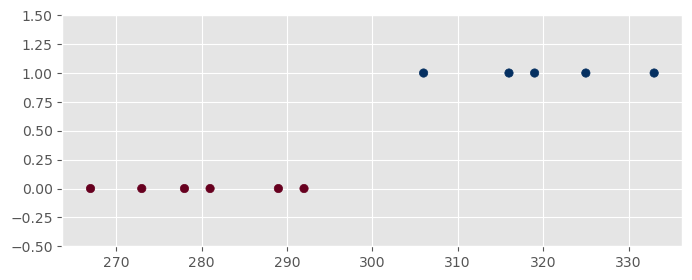

In [2]:
x = np.array([267, 273, 278, 281, 289, 292, 306, 316, 319, 325, 333])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()
ax.scatter(x, y, c=y, cmap='RdBu')
ax.set_ylim(-0.5, 1.5)

思路：以 $x=300$ 为界

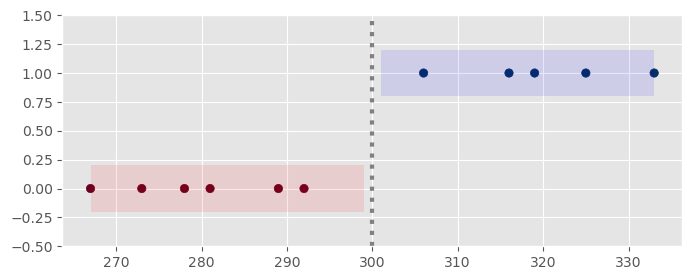

In [3]:
ax.plot([300, 300], [-0.5, 1.5], ':', color='grey', linewidth=3)
ax.fill_between([267, 299], [-0.2, -0.2], [0.2, 0.2], facecolor='red', alpha=0.1)
ax.fill_between([301, 333], [0.8, 0.8], [1.2, 1.2], facecolor='blue', alpha=0.1)
fig

现在呢？

(-0.5, 1.5)

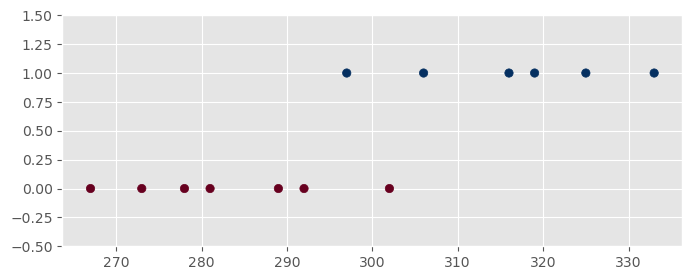

In [4]:
x = np.concatenate([x, [302, 297]])
y = np.concatenate([y, [0, 1]])
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()
ax.scatter(x, y, c=y, cmap='RdBu')
ax.set_ylim(-0.5, 1.5)

直观上看，样本分布仍然有以下规律：

* $x \ll 300$ 较多时，该样本属于分类“ 0 ”
* $x \gg 300$ 较多时，它属于分类“ 1 ”
* $x \sim 300$ 附近时，样本可能属于分类“ 0 ”也可能属于分类“ 1 ”。


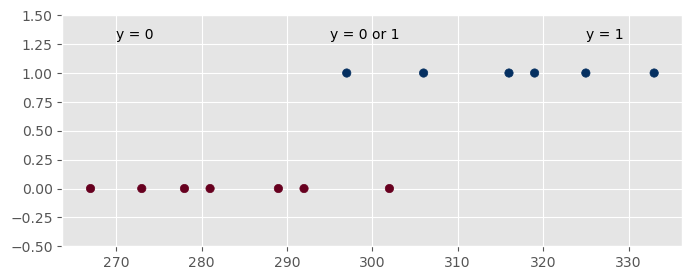

In [5]:
ax.text(270, 1.3, 'y = 0')
ax.text(295, 1.3, 'y = 0 or 1')
ax.text(325, 1.3, 'y = 1')
fig

如何描述这种可能性？

使用概率函数

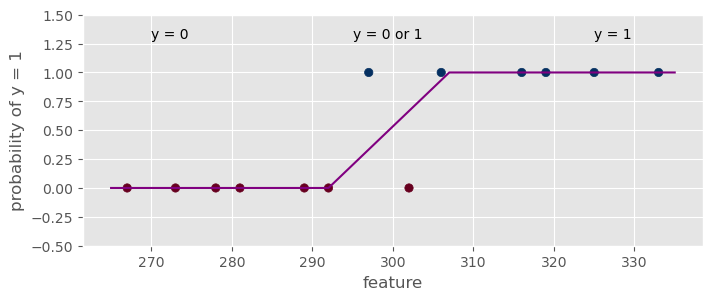

In [6]:
_line, = ax.plot([265, 292, 307, 335], [0, 0, 1, 1], color='purple')
ax.set_ylabel('probability of y = 1')
ax.set_xlabel('feature')
fig


概率函数为线性，不好，太僵硬

使用 sigmoid 函数

In [7]:
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))

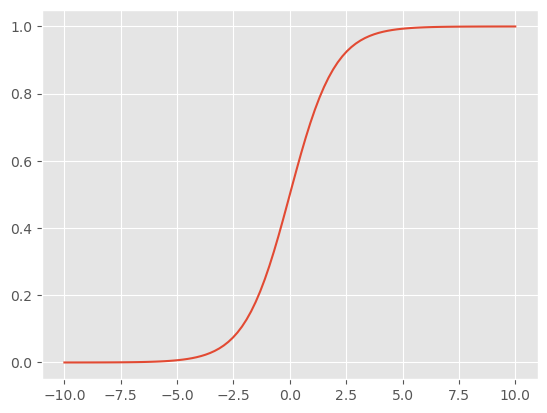

In [8]:
__x = np.linspace(-10, 10, 100)
plt.plot(__x, sigmoid(__x))

该函数的特点：

1. $x \ll 0$ 较多时，$ \mathrm{sigmoid}(x) $ 十分趋近 0 
2. $x \gg 0$ 较多时，$ \mathrm{sigmoid}(x) $ 十分趋近 1 
3. $x \sim 0$ 附近时，$ \mathrm{sigmoid}(x) $ 由 0 到 1 有平缓的过渡
4. 该函数于 $ (0, 0.5) $ 中心对称

比较贴近真实情况下的概率分布。

> [Why logistic regression use sigmoid function? Answer on Quora](https://www.quora.com/Logistic-Regression-Why-sigmoid-function/answer/Roi-Yehoshua?target_type=answer)

换元，将 sigmoid 应用到具体的场景中：

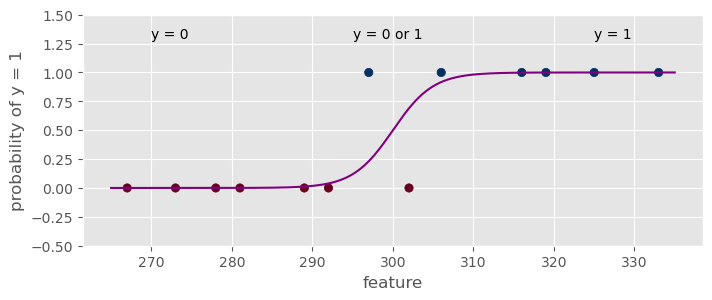

In [9]:
_line.remove()
__x_plot = np.linspace(265, 335, 1000)
ax.plot(__x_plot, sigmoid((__x_plot - 300) / 2.5), color='purple')
fig

### Scikit-Learn 的逻辑回归模型

In [10]:
X = np.array(x).reshape(-1, 1)
y = np.array(y)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [11]:
model.predict([[270], [295], [305], [320]])

array([0, 0, 1, 1])

相比硬分类，逻辑回归支持预测概率

In [12]:
model.predict_proba([[270], [297], [300], [320]])

array([[9.99411784e-01, 5.88216310e-04],
       [6.59217705e-01, 3.40782295e-01],
       [4.76691144e-01, 5.23308856e-01],
       [5.97572205e-03, 9.94024278e-01]])

通过检查区间范围的分布概率来绘制连续的概率曲线

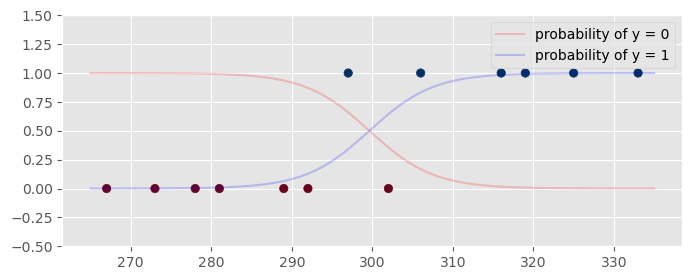

In [13]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()
ax.scatter(x, y, c=y, cmap='RdBu')
ax.set_ylim(-0.5, 1.5)

__y_plot = model.predict_proba(__x_plot.reshape(-1, 1))
ax.plot(__x_plot, __y_plot[:, 0], 
        color='r', alpha=0.2, label='probability of y = 0')
ax.plot(__x_plot, __y_plot[:, 1], 
        color='b', alpha=0.2, label='probability of y = 1')
ax.legend()

## 深入认识逻辑回归

In [14]:
rand = np.random.RandomState(2)

二分类数据

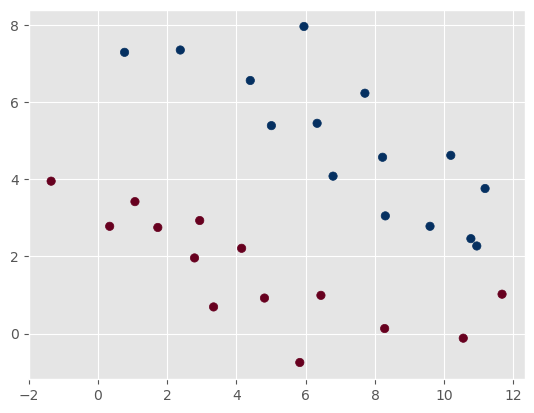

In [15]:
data = pd.read_csv('dataset/logistic-regression-explain-1.csv')
plt.scatter(data['x'], data['y'], c=data['label'], cmap='RdBu')

### 决策边界

多特征变量下的逻辑回归表达式：

$$
\begin{align}
    h_\theta(y) &= \frac{1}{1 + {\large e}^{\displaystyle{-(\theta_n x^n + \theta_{n-1} x^{n-1} + \cdots + \theta_1 x + \theta_0)}}}\\
                &= \frac{1}{1 + {\large e}^{\displaystyle{-\boldsymbol{\theta}^T \boldsymbol{x}}}}
\end{align}
$$

$\boldsymbol{\theta}^T \boldsymbol{x}$ 为实际情况的决策边界：当 $ \boldsymbol{\theta}^T \boldsymbol{x} > 0 $ 预测样本属于类别“ 1 ”；当 $ \boldsymbol{\theta}^T \boldsymbol{x} < 0 $ 则预测样本属于类别“ 0 ”。

可视化展示：

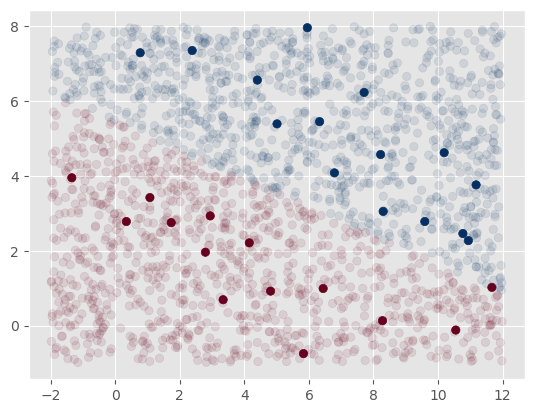

In [16]:
__model = LogisticRegression().fit(data[['x', 'y']].values, data['label'])

__X_rand = rand.rand(2000, 2) * [14, 9] + [-2, -1]
__y_rand = __model.predict(__X_rand)

plt.scatter(data['x'], data['y'], c=data['label'], cmap='RdBu')
plt.scatter(__X_rand[:, 0], __X_rand[:, 1], c=__y_rand, alpha=0.1, cmap='RdBu')

### 代价函数

如何选择 $ \boldsymbol{\theta} $ ？

需要一个指标衡量模型与样本的差异：代价函数

代价函数最小时，模型与样本的差异最小，模型最好，此时的  即为所需要的参数。

回顾：线性回归的代价函数：均方误差

$$
\begin{align}
\mathrm{MSE}(\boldsymbol{\theta}) &= \frac 1 n \sum_{i=1}^{n}(y_{pred}^{(i)}-y^{(i)})^2 \\
        &= \frac 1 n \sum_{i=1}^{n}(\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}-y^{(i)})^2 \\
\end{align}
$$

残差：衡量实际值与预测值的误差 $ y_{pred}^{(i)}-y^{(i)} $

平方：消除正负符号的影响

和：衡量整个模型的总体指标

类似在逻辑回归，单个样本的代价：

$$
\mathrm{cost}(h_\theta (\boldsymbol{x}), y) = \begin{cases}
        -\log(h_\theta (\boldsymbol{x})) & \text{if} \quad y = 1 \\
        -\log(1 - h_\theta (\boldsymbol{x})) & \text{if} \quad y = 0
\end{cases}
$$

对数：让完全分错类（概率接近 0 ）的样本造成很大的误差，迫使重视

负：使误差与代价呈正相关

为什么要取对数：一个严格的计算

In [17]:
bad_boundary = lambda x: 6.46 - 0.582 * x
good_boundary = lambda x: 5.37 - 0.369 * x

bad_cost = lambda proba, label: 1 -label * proba - (1 - label) * (1 - proba)
good_cost = lambda proba, label: 0 - label * np.log(proba) - (1 - label) * np.log(1 - proba)

print(f'Bad cost function with bad boundary   : ', 
      bad_cost(sigmoid(data['y'] - bad_boundary(data['x'])), data['label']).sum())
print(f'Bad cost function with good boundary  : ', 
      bad_cost(sigmoid(data['y'] - good_boundary(data['x'])), data['label']).sum())
print(f'Good cost function with bad boundary  : ', 
      good_cost(sigmoid(data['y'] - bad_boundary(data['x'])), data['label']).sum())
print(f'Good cost function with good boundary : ', 
      good_cost(sigmoid(data['y'] - good_boundary(data['x'])), data['label']).sum())

Bad cost function with bad boundary   :  3.5438102597716803
Bad cost function with good boundary  :  3.9920130331876296
Good cost function with bad boundary  :  4.607168126256977
Good cost function with good boundary :  4.553488309289629


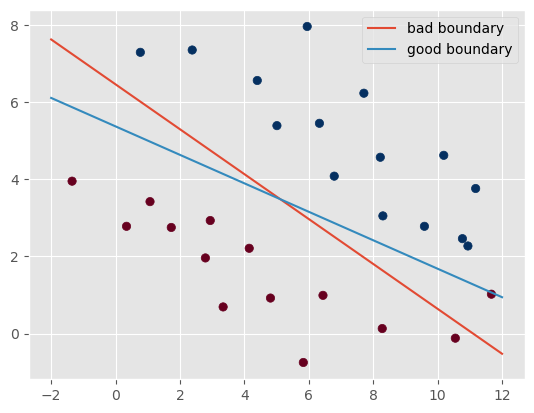

In [18]:
__x_range = np.linspace(-2, 12, 10)
plt.plot(__x_range, bad_boundary(__x_range), label='bad boundary')
plt.plot(__x_range, good_boundary(__x_range), label='good boundary')
plt.scatter(data['x'], data['y'], c=data['label'], cmap='RdBu')
plt.legend()


模型总体的代价函数：

$$
J(\boldsymbol{\theta}) = \frac 1 n \sum_{i=1}^{n} \mathrm{cost}(h_\theta (\boldsymbol{x_i}), y_i)
$$

如何求解参数 $ \boldsymbol{\theta} $ ？

### 梯度下降：通用的优化策略

梯度下降的可视化过程演示

(-2.0, 9.0)

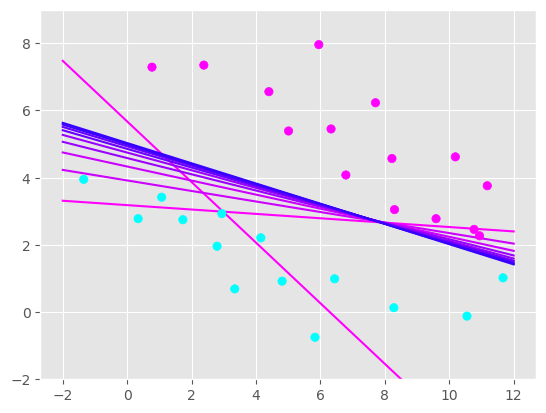

In [19]:
_x_range = np.linspace(-2, 12, 100)

class MyLogisticRegression:
    """代码来自 https://github.com/NELSONZHAO/machine-learning-implementation-with-numpy
    """
    def __init__(self, max_iter=1000, learning_rate=0.1, 
                 class_weight=None, verbose=True,
                 init_mode='zeros'):
        
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.init_mode = init_mode
        self.costs = []

    def __initialize_weights(self, shape, mode='zeros'):
        if mode == "zeros":
            self.coef_ = np.zeros((shape, 1))
            self.intercept_ = 0
        elif mode == 'norm':
            self.coef_ = np.random.randn(shape, 1)
            self.intercept_ = np.random.randn(1)[0]

    def __derivative_sigmoid(self, z):
        return sigmoid(z) * (1.0 - sigmoid(z))

    def __propagate(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(1, n_samples)

        z = np.dot(self.coef_.T, X.T) + self.intercept_
        h_theta = sigmoid(z)
        cost = (-1.0 / n_samples) * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))

        dz = h_theta - y
        dw = (1.0 / n_samples) * np.dot(X.T, dz.T)
        db = (1.0 / n_samples) * np.sum(dz)

        cost = np.squeeze(cost)
        grads = {'dw': dw, 'db': db}
        return grads, cost

    def fit(self, X, y, samp_weights=None):
        X = np.array(X)
        y = np.array(y)
        self.__initialize_weights(X.shape[1], self.init_mode)
        
        for i in range(self.max_iter):
            grads, cost = self.__propagate(X, y)
            dw = grads.get('dw')
            db = grads.get('db')

            self.coef_ = self.coef_ - self.learning_rate * dw
            self.intercept_ = self.intercept_ - self.learning_rate * db
            if i % 10 == 0:
                self.costs.append(cost)

            if self.verbose and i % 50 == 0:
                plt.plot(_x_range, (0.5 - self.coef_[0, 0] * _x_range - self.intercept_) / self.coef_[1, 0], 
                         color='#'+hex(255-i // 100 * 50)[2:]+'00ff', zorder=1)

    def __predict(self, X):
        return np.dot(self.coef_.T, X.T) + self.intercept_
    def predict(self, X):
        return (self.__predict(X) >= 0.5).astype(np.int64).squeeze()
    def predict_proba(self, X):
        return self.__predict(X)

MyLogisticRegression(max_iter=500).fit(data[['x', 'y']].values, data['label'])

plt.scatter(data['x'], data['y'], c=data['label'], cmap='cool', zorder=2)
plt.ylim(-2, 9)

### 逻辑回归与正则化

正则化：防止过拟合

不使用正则化，决策边界很糟糕：

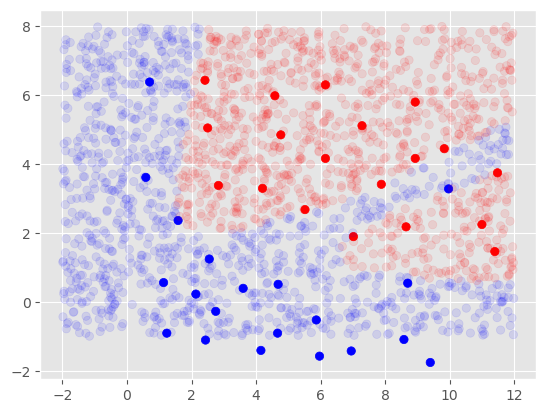

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)

__data = pd.read_csv('dataset/point dataset (1).csv')
__X = poly.fit_transform(__data[['x', 'y']].values)

__bad_model = LogisticRegression(penalty='none', max_iter=5000).fit(__X, __data['label'])

__y_rand = __bad_model.predict(poly.transform(__X_rand))

plt.scatter(__data['x'], __data['y'], c=__data['label'], cmap='bwr')
plt.scatter(__X_rand[:, 0], __X_rand[:, 1], c=__y_rand, alpha=0.1, cmap='bwr')

为模型添加正则化项，防止参数过大：

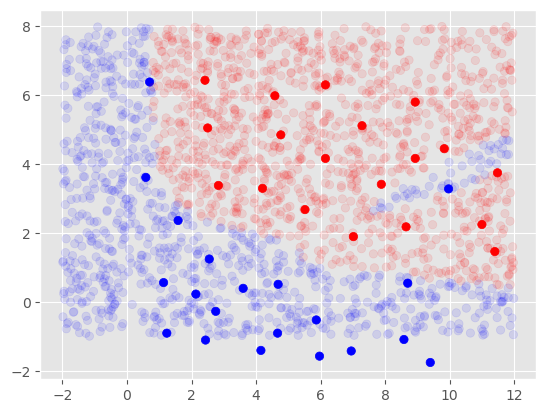

In [21]:
__good_model = LogisticRegression(max_iter=5000).fit(__X, __data['label'])

__y_rand = __good_model.predict(poly.transform(__X_rand))

plt.scatter(__data['x'], __data['y'], c=__data['label'], cmap='bwr')
plt.scatter(__X_rand[:, 0], __X_rand[:, 1], c=__y_rand, alpha=0.1, cmap='bwr')